In [2]:
# Import the modules
import pandas as pd
from pathlib import Path

In [3]:
# Read in the CSV file as a Pandas DataFrame
diabetes_df = pd.read_csv(
    Path("../Resources/Data/diabetes_012_health_indicators_BRFSS2015.csv")
)

# Review the DataFrame
diabetes_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
diabetes_df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [5]:
diabetes_df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


How do physical activity, alcohol consumption, and smoking behaviors vary between individuals with and without diabetes, based on statistical analysis?
	•	This specifies that you’re using statistical methods to analyze the differences.

In [13]:
# Check for missing values
diabetes_df.isnull().sum()

# Get basic statistics of relevant columns
diabetes_df[['Diabetes_012', 'PhysActivity', 'HvyAlcoholConsump', 'Smoker']].describe()

,Diabetes_012,PhysActivity,HvyAlcoholConsump,Smoker
count,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.756544,0.056197,0.443169
std,0.698160,0.429169,0.230302,0.496761
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000
max,2.000000,1.000000,1.000000,1.000000


In [ ]:
# Since Diabetes_012 is categorical (0 = No Diabetes, 1 = Pre-Diabetes, 2 = Diabetes),
# We need to compare the means of PhysActivity, HvyAlcoholConsump, and Smoker across different groups.

In [14]:
from scipy.stats import ttest_ind

# Separate groups: Non-Diabetic (0) and Diabetic (2)
non_diabetic = diabetes_df[diabetes_df['Diabetes_012'] == 0]
diabetic = diabetes_df[diabetes_df['Diabetes_012'] == 2]

# Perform t-tests
phys_ttest = ttest_ind(non_diabetic['PhysActivity'], diabetic['PhysActivity'])
alcohol_ttest = ttest_ind(non_diabetic['HvyAlcoholConsump'], diabetic['HvyAlcoholConsump'])
smoking_ttest = ttest_ind(non_diabetic['Smoker'], diabetic['Smoker'])

# Display results
print("Physical Activity:", phys_ttest)
print("Alcohol Consumption:", alcohol_ttest)
print("Smoking:", smoking_ttest)

Physical Activity: TtestResult(statistic=60.84562550742157, pvalue=0.0, df=249047.0)
Alcohol Consumption: TtestResult(statistic=28.96339955774016, pvalue=3.857021894170942e-184, df=249047.0)
Smoking: TtestResult(statistic=-31.106904449145443, pvalue=4.970175317070884e-212, df=249047.0)


Which lifestyle factors (e.g., physical activity, alcohol consumption, smoking) show the strongest association with diabetes risk?

This makes it clear that you’re looking for the most significant contributing factors.

In [15]:
# Compute Pearson correlation between Diabetes and lifestyle factors
correlation_matrix = diabetes_df[['Diabetes_012', 'PhysActivity', 'HvyAlcoholConsump', 'Smoker']].corr()

# Display correlation values
correlation_matrix

,Diabetes_012,PhysActivity,HvyAlcoholConsump,Smoker
Diabetes_012,1.000000,-0.121947,-0.057882,0.062914
PhysActivity,-0.121947,1.000000,0.012392,-0.087401
HvyAlcoholConsump,-0.057882,0.012392,1.000000,0.101619
Smoker,0.062914,-0.087401,0.101619,1.000000


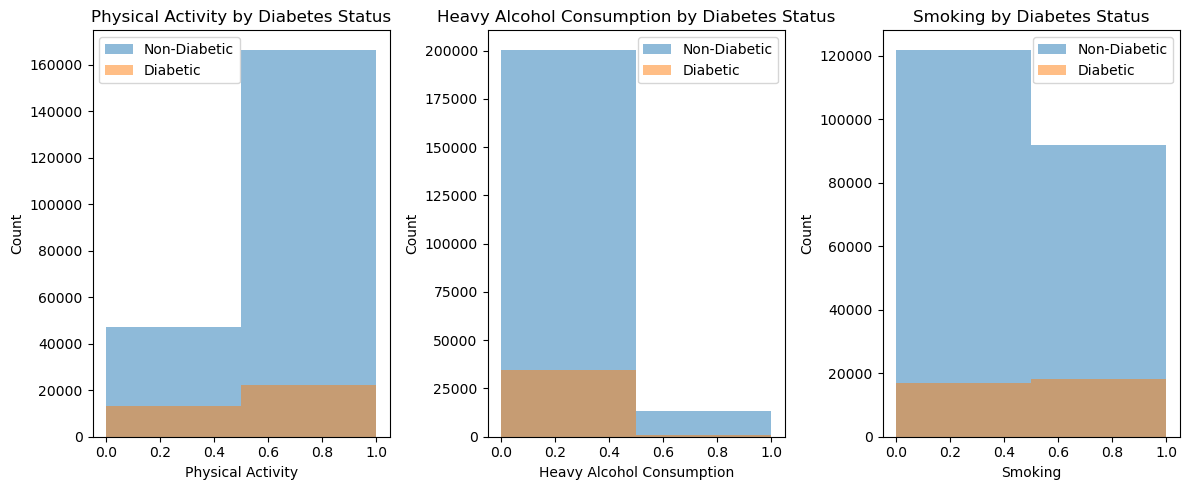

In [16]:
import matplotlib.pyplot as plt

# Define lifestyle factors
factors = ['PhysActivity', 'HvyAlcoholConsump', 'Smoker']
labels = ['Physical Activity', 'Heavy Alcohol Consumption', 'Smoking']

# Set up figure
plt.figure(figsize=(12, 5))

# Create subplots for each factor
for i, col in enumerate(factors, 1):
    plt.subplot(1, 3, i)
    plt.hist(diabetes_df[diabetes_df['Diabetes_012'] == 0][col], alpha=0.5, label='Non-Diabetic', bins=2)
    plt.hist(diabetes_df[diabetes_df['Diabetes_012'] == 2][col], alpha=0.5, label='Diabetic', bins=2)
    plt.title(f'{labels[i-1]} by Diabetes Status')
    plt.xlabel(labels[i-1])
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()

extend this analysis with a logistic regression model 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Select features (independent variables)
X = diabetes_df[['PhysActivity', 'HvyAlcoholConsump', 'Smoker']]

# Target variable (dependent variable: Diabetes_012, where 0 = No Diabetes, 2 = Diabetes)
y = (diabetes_df['Diabetes_012'] == 2).astype(int)  # Convert to binary classification (0 = No, 1 = Yes)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance (Logistic Regression Coefficients)
coefficients = model.coef_[0]
feature_importance = dict(zip(X.columns, coefficients))

print("\nFeature Importance (Logistic Regression Coefficients):")
for feature, coef in feature_importance.items():
    print(f"{feature}: {coef:.4f}")

Accuracy: 0.8621

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93     43739
           1       0.00      0.00      0.00      6997

    accuracy                           0.86     50736
   macro avg       0.43      0.50      0.46     50736
weighted avg       0.74      0.86      0.80     50736


Confusion Matrix:
 [[43739     0]
 [ 6997     0]]

Feature Importance (Logistic Regression Coefficients):
PhysActivity: -0.6778
HvyAlcoholConsump: -1.0330
Smoker: 0.3419


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Next Steps to Improve the Model:
	1.	Handle Class Imbalance:
	•	Oversample the minority class (diabetic individuals) using techniques like SMOTE (Synthetic Minority Over-sampling Technique).
	•	Undersample the majority class (non-diabetic individuals) to balance the dataset.
	•	Alternatively, you could adjust the class weights in Logistic Regression to give more importance to the minority class.
    

In [ ]:
#pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [20]:
# Separate features and target
X = diabetes_df.drop(columns=['Diabetes_012'])
y = diabetes_df['Diabetes_012']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

Class distribution after SMOTE:
Diabetes_012
0.0    170908
2.0    170908
1.0    170908
Name: count, dtype: int64


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train Logistic Regression on the resampled dataset
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9376

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42795
         1.0       0.17      0.58      0.26       944
         2.0       0.91      0.60      0.73      6997

    accuracy                           0.94     50736
   macro avg       0.69      0.73      0.66     50736
weighted avg       0.97      0.94      0.95     50736



Breakdown of results 

Key Points from the Classification Report:
- Class 0 (Non-diabetic): The model performs exceptionally well for this class with a precision and recall of 1.00, meaning it perfectly identifies non-diabetic individuals.
- Class 1 (Diabetic): The model struggles here with a recall of 0.58 (i.e., it only correctly identifies 58% of the actual diabetic cases), and the f1-score of 0.26 reflects this weakness.
- Class 2 (Uncertain Diabetes): The model performs reasonably well for this class with a recall of 0.60 and f1-score of 0.73.